#### License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"> CC BY Creative Commons License</a>, with the exception of the data (a seismic section from the [Penobscot 3D](https://terranubis.com/datainfo/Penobscot) which is covered by a [CC BY-SA Creative Commons License](https://creativecommons.org/licenses/by-sa/3.0/)).

#### Preliminaries

In [1]:
import os
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import skimage.color as skl

#### Load seismic data

In [2]:
data_folder = "data/"

In [3]:
seis_file = os.path.join(data_folder,'PenobXL_1155.txt')
data = np.fliplr(np.transpose(np.loadtxt(seis_file)))

#### Helper functions

In [4]:
def normalise(data):
    """
    Normalize ans array to [0-1] range
    """
    data_n = (data-np.amin(data)) / (np.amax(data)-np.amin(data))
    return data_n 

def make_rgb(data_n):
    """
    Make 3 equal R, G, and B arrays from a single array
    input assumed in [0-1] range
    """
    data_rgb = np.stack((data_n,)*3, axis=-1)
    return data_rgb 

def Lab_lightness(rgb):
    """
    Return Lightness of an RGB array
    """
    Lab = skl.rgb2lab(rgb)
    L = Lab[:,:,0]
    return L
    
def Sobel_2d(data):
    """
    Calculate 2D Sobel filter
    """
    dx = ndi.sobel(data, 0)  # horizontal derivative
    dy = ndi.sobel(data, 1)  # vertical derivative
    mag = np.hypot(dx, dy)      # magnitude
    mag *= 255.0 / np.max(mag)  # normalize
    return mag
    

In [5]:
def mk_cmapped_data(data, mpl_cmap_name):
    """
    Save colormapped data from a plot to a numpy array
    """
    
    # Make the figure (but not plotting it) without anything BUT the data
    # Hacked starting from matehat's SO answer: 
    # https://stackoverflow.com/a/8218887/1034648
    fig = plt.figure(frameon=False)
    fig.set_size_inches((5.57,13.94)) # defined by trial and error to have output same size as input
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap(mpl_cmap_name)
    ax.imshow(data, aspect='auto', interpolation = 'none')
    fig.canvas.draw()

    # Save data to a numpy array
    # From Joe Kington's SO answer: 
    # https://stackoverflow.com/a/7821917/1034648
    mat = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    mat = mat.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    mat = normalise(mat)
    plt.close(fig=None)
    return mat

In [6]:
data_n= normalise(data)
data_rgb= make_rgb(data_n) 

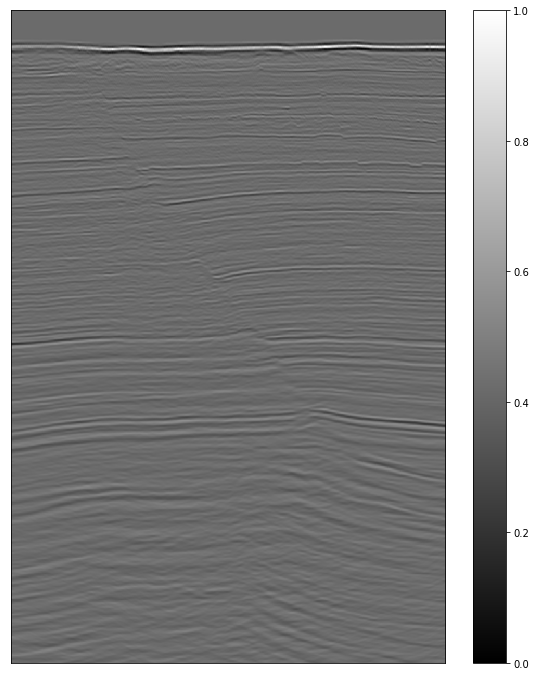

In [7]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data_rgb, cmap='gray', aspect = 0.6,  interpolation = 'none')
plt.colorbar()
plt.show()

In [8]:
mat = mk_cmapped_data(data, 'jet')

In [9]:
mat.shape

(1003, 401, 3)

In [10]:
data_rgb.shape

(1003, 401, 3)

In [11]:
L = Lab_lightness(data_rgb)
L_cmapped = Lab_lightness(mat)

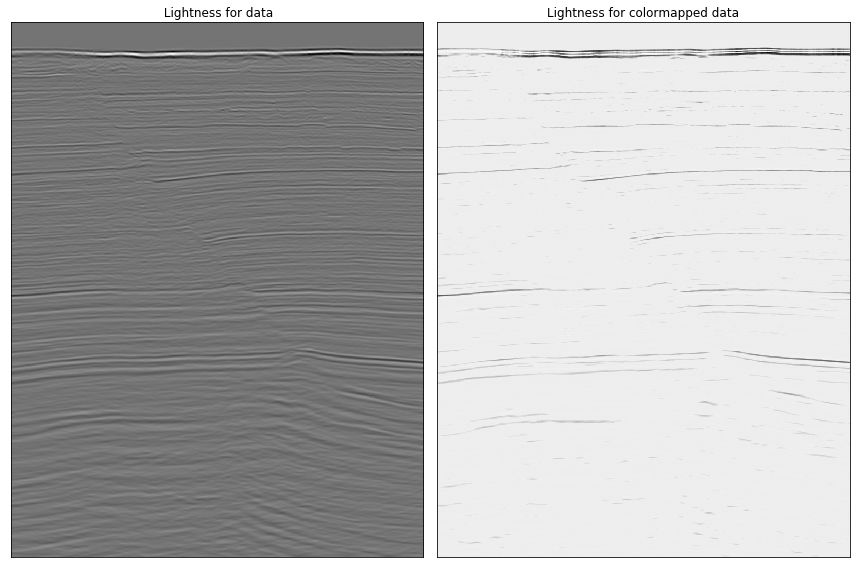

In [12]:
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(L, cmap='gray', aspect = 'auto', interpolation = 'none')

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title(' Lightness for data')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(L_cmapped, cmap='gray', aspect = 'auto', interpolation = 'none')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Lightness for colormapped data')

plt.tight_layout();

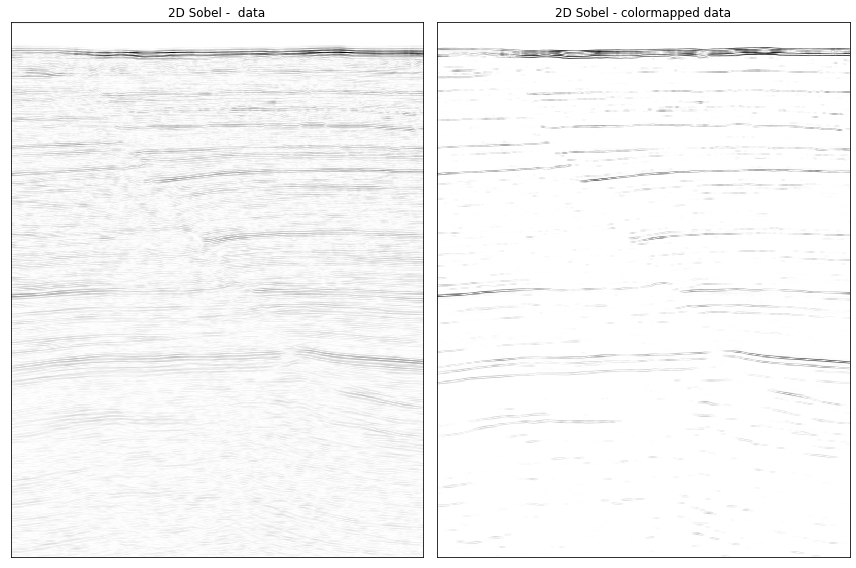

In [13]:
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(Sobel_2d(L), cmap='gray_r', aspect = 'auto', interpolation = 'none')

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('2D Sobel -  data')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(Sobel_2d(L_cmapped), cmap='gray_r', aspect = 'auto', interpolation = 'none')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('2D Sobel - colormapped data')

plt.tight_layout();